In [12]:
import pandas as pd 
import re 

import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stem = PorterStemmer()

In [87]:
test = pd.read_csv('emotion-labels-test.csv')
train = pd.read_csv('emotion-labels-train.csv')
val = pd.read_csv('emotion-labels-val.csv')


In [88]:
df = pd.concat([test , train ,val ] , axis = 0)
dataframe = pd.concat([test , train ,val ] , axis = 0)

In [90]:
df.head()
df.reset_index(drop=True, inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [44]:
df.shape

(7102, 2)

In [45]:
df.dropna(inplace = True)

In [46]:
df.tail()
df.shape

(7102, 2)

In [47]:
corpus = []

for i in range(0 , len(df)): 
    review = re.sub(r'[^a-zA-Z]', " ", df['text'].iloc[i])

    review = review.lower()
    review = review.split()
    review = [stem.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

<Axes: xlabel='label'>

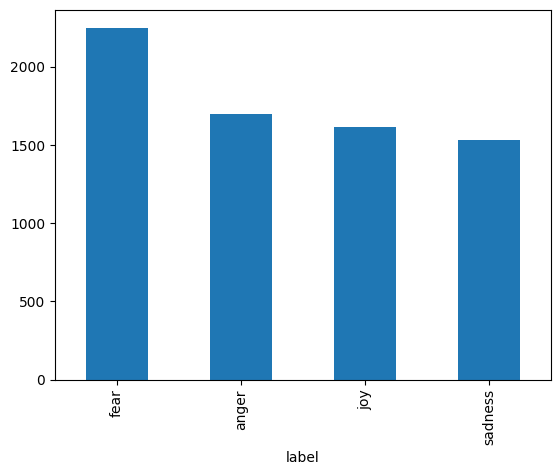

In [20]:
df['label'].value_counts().plot(kind = 'bar')

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


vect = TfidfVectorizer()

In [22]:
X = vect.fit_transform(corpus).toarray()

In [50]:
from sklearn.preprocessing import LabelEncoder
labels =LabelEncoder()

y= labels.fit_transform(df['label'])

# y =pd.get_dummies(df['label'] , dtype = int).iloc[ :,0]

In [51]:
from sklearn.model_selection import train_test_split
# y = df['']
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.3)

In [52]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [53]:
model.fit(X_train , y_train)

MultinomialNB()

In [54]:
y_pred=  model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score , classification_report

In [56]:
accuracy_score(y_test , y_pred)

0.7433129985922102

In [58]:
df['text'][1000]

"I walked 3.4 miles today, the most I've walked since I got #rhabdo. Going back to work tomorrow.. here's to hoping it goes okay "

In [57]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       491
           1       0.61      0.95      0.74       670
           2       0.92      0.66      0.77       514
           3       0.83      0.52      0.64       456

    accuracy                           0.74      2131
   macro avg       0.80      0.72      0.74      2131
weighted avg       0.79      0.74      0.74      2131



In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(X_train , y_train)

RandomForestClassifier(random_state=0)

In [64]:
y_predd = rfc.predict(X_test)
print(accuracy_score(y_test , y_predd))

0.8498357578601595


In [65]:
print(classification_report(y_test , y_predd))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       491
           1       0.78      0.92      0.84       670
           2       0.94      0.86      0.90       514
           3       0.82      0.78      0.80       456

    accuracy                           0.85      2131
   macro avg       0.86      0.84      0.85      2131
weighted avg       0.86      0.85      0.85      2131



In [79]:
test_txt = df['text'][1000]
test_txt

"I walked 3.4 miles today, the most I've walked since I got #rhabdo. Going back to work tomorrow.. here's to hoping it goes okay "

In [80]:
test_ans = df['label'][1000]
test_ans

np.int64(1)

In [81]:
test_test_vector = X[1000]
test_test_vector

array([0., 0., 0., ..., 0., 0., 0.], shape=(12682,))

In [83]:
rfc.predict([test_test_vector])

array([1])

In [92]:
print(dataframe['label'][1000] , "---->" , test_ans)

fear ----> 1
